In [3]:
import qiskit
from qiskit import IBMQ
from qiskit.visualization import plot_histogram

In [4]:
provider = IBMQ.load_account()

In [5]:
from qiskit.providers.ibmq import least_busy

large_enough_devices = provider.backends(filters=lambda x: x.configuration().n_qubits > 13 and not x.configuration().simulator)
backend = least_busy(large_enough_devices)
print("The best backend is " + backend.name())

The best backend is ibmq_16_melbourne


setosa: 5d7ba62372be470018b3953d  
versicolor: 5da59372beb3350011051548    
unknown: 5d7b6a7a59f29d001a16e0b1

In [20]:
# Riprendi un determinato ordine usando il suo id
job_retrieved = backend.retrieve_job('5da5982c1ad63100112315f9')

/home/mariano/anaconda3/envs/qiskit/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqbackend.py:285: UserWarning: Job "5da5982c1ad63100112315f9" belongs to another backend than the one queried. The query was made on backend "ibmq_16_melbourne", but the job actually belongs to backend "ibmq_qasm_simulator".
  .format(job_id, self.name(), job_backend_name))


IBMQBackendError: 'Failed to get job "5da5982c1ad63100112315f9": job does not belong to backend "ibmq_16_melbourne".'

In [18]:
result_retrieved = job_retrieved.result()
counts_retrieved = result_retrieved.get_counts()
goodCounts_retrieved = {k: counts_retrieved[k] for k in counts_retrieved.keys() & {'0001', '0101', '1001', '1101'}}

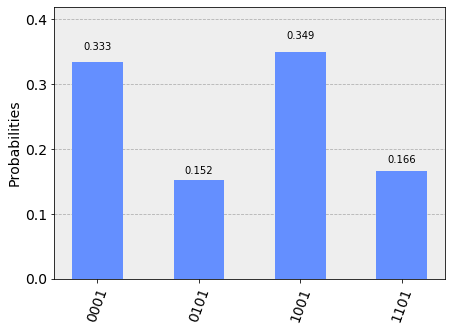

In [19]:
plot_histogram(goodCounts_retrieved)